In [ ]:
# This is a Notebook to explore the Fifa Dataset

In [44]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#set up the dataset
cols=['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
     'Preferred Foot', 'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
      'Contract Valid Until', 'Height', 'Weight', 'Release Clause']
df=pd.read_csv('fifa_data.csv', usecols=cols)
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M


In [106]:
#Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  18207 non-null  object 
 1   Age                   18207 non-null  int64  
 2   Nationality           18207 non-null  object 
 3   Overall               18207 non-null  int64  
 4   Potential             18207 non-null  int64  
 5   Club                  17966 non-null  object 
 6   Value                 18207 non-null  float64
 7   Wage                  18207 non-null  float64
 8   Preferred Foot        18159 non-null  object 
 9   Body Type             18159 non-null  object 
 10  Position              18147 non-null  object 
 11  Jersey Number         18147 non-null  float64
 12  Joined                16654 non-null  object 
 13  Loaned From           1264 non-null   object 
 14  Contract Valid Until  17918 non-null  object 
 15  Height             

In [107]:
df.describe()

,Age,Overall,Potential,Value,Wage,Jersey Number,Height,Weight,Release Clause,Gap
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18147.000000,18159.000000,18159.000000,1.820700e+04,18207.000000
mean,25.122206,66.238699,71.307299,2.410696e+06,9731.312133,19.546096,178.403133,165.979129,4.191200e+06,5.068600
std,4.669943,6.908930,6.136496,5.594933e+06,21999.290406,15.947765,6.624159,15.593344,1.070778e+07,5.417266
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,152.500000,110.000000,0.000000e+00,0.000000
25%,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,8.000000,172.500000,154.000000,3.920000e+05,0.000000
50%,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,17.000000,177.500000,165.000000,1.000000e+06,3.000000
75%,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,26.000000,182.500000,176.000000,3.000000e+06,9.000000
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,99.000000,202.500000,243.000000,2.281000e+08,26.000000


In [92]:
#Cleaning the currency columns
def convert_scale(value):
    if value.endswith('M'):
        return float(value[:-1])* 10**6
    elif value.endswith('K'):
        return float(value[:-1])* 10**3
    else:
        return float(value)
    
df['Value']=df['Value'].str.replace('€','').apply(convert_scale) #convert Value column
df['Wage']=df['Wage'].str.replace('€','').apply(convert_scale) #convert Wage column

#convert Release Clause column
df['Release Clause']=df['Release Clause'].fillna('0M')
df['Release Clause']=df['Release Clause'].str.replace('€','').apply(convert_scale) 

df.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,196400000.0


In [93]:
# Converting the Weight and Height Columns
df['Weight']=df['Weight'].str.replace(r'\D+', '', regex=True).astype(float)

def height_to_cm(height):
    try:
        converted = height.split("'")
        float_value = (float(converted[0])*12+float(converted[1]))*2.5
    except:
        float_value = np.nan
    return float_value

df['Height']=df['Height'].apply(height_to_cm)

df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,167.5,159.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,185.0,183.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,172.5,150.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,190.0,168.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,177.5,154.0,196400000.0


Some questions to answer
1)What countries have the most players in competition
2)What countries have the highest average overall ranking
3)What clubs have the highest overall ranking
4)What percentage of players are right footed versus left
5)What is the average value of players by club
6)What is the average wage of players by club
7)What is the age breakdown of players
8)Which clubs are the biggest over/underachievers (Overall vs. Potential)

In [94]:
df['Nationality'].value_counts() #Question 1

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64

In [95]:
#Question 2
country_score=df.groupby('Nationality')['Overall'].mean().nlargest(10)
country_score

Nationality
United Arab Emirates    77.000000
Central African Rep.    73.333333
Israel                  72.142857
Dominican Republic      72.000000
Oman                    72.000000
São Tomé & Príncipe     72.000000
Cape Verde              71.631579
Portugal                71.344720
Togo                    71.333333
Brazil                  71.251511
Name: Overall, dtype: float64

In [96]:
#Question 3
club_score=country_score=df.groupby('Club')['Overall'].mean().nlargest(10)
club_score

Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
FC Bayern München      77.000000
Name: Overall, dtype: float64

In [97]:
df['Preferred Foot'].value_counts(normalize=True) #Question #4

Right    0.768104
Left     0.231896
Name: Preferred Foot, dtype: float64

In [98]:
club_avg_val=df.groupby('Club')['Value'].mean().nlargest(10) #Question #5
club_avg_val

Club
Juventus               2.817900e+07
Real Madrid            2.649773e+07
FC Barcelona           2.583636e+07
Manchester City        2.383500e+07
FC Bayern München      2.341466e+07
Paris Saint-Germain    2.084417e+07
Napoli                 2.056000e+07
Atlético Madrid        1.953106e+07
Inter                  1.943688e+07
Tottenham Hotspur      1.874091e+07
Name: Value, dtype: float64

In [99]:
club_avg_wag=df.groupby('Club')['Wage'].mean().nlargest(10) #Question #6
club_avg_wag

Club
Real Madrid          152030.303030
FC Barcelona         146575.757576
Juventus             131680.000000
Manchester City      113363.636364
Manchester United    102757.575758
Chelsea               98454.545455
Liverpool             87939.393939
Tottenham Hotspur     79484.848485
FC Bayern München     78827.586207
Arsenal               78424.242424
Name: Wage, dtype: float64

Text(0, 0.5, '# of Players')

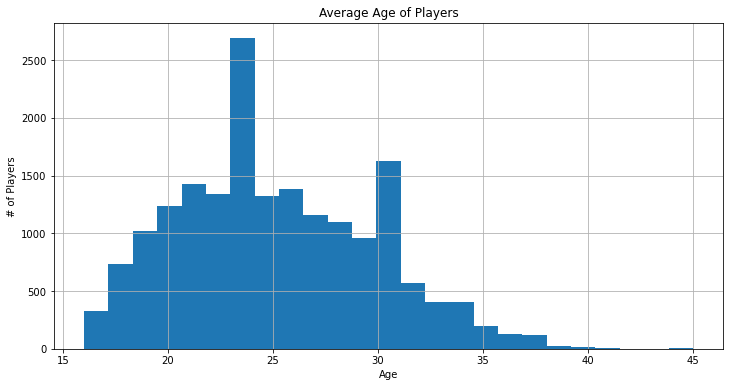

In [100]:
plt.figure(figsize=(12,6)) #Question #7 Visualized

df['Age'].plot.hist(grid=True, bins=25)
plt.title('Average Age of Players')
plt.xlabel('Age')
plt.ylabel('# of Players')

23 and 31 seem to be the most common ages for players with the bulk of players being between 20 and 31

In [104]:
df['Gap']= df['Potential']-df['Overall']
Underachievers=df.groupby('Club')['Gap'].sum().nlargest(20)
Achievers=df.groupby('Club')['Gap'].sum().nsmallest(20)
Achievers

Club
América FC (Minas Gerais)     0
Atlético Mineiro              0
Atlético Paranaense           0
Bahia                         0
Botafogo                      0
Ceará Sporting Club           0
Chapecoense                   0
Cruzeiro                      0
Fluminense                    0
Grêmio                        0
Internacional                 0
Paraná                        0
Santos                        0
Sport Club do Recife          0
Vitória                       0
Akhisar Belediyespor         31
MKE Ankaragücü               42
Inter                        48
Cerezo Osaka                 51
Urawa Red Diamonds           52
Name: Gap, dtype: int64